In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [5]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")

In [7]:
model = tf.keras.Sequential([layers.Dense(57, activation='softmax'),layers.Dense(1, activation='sigmoid')])
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_data,train_label,epochs=32,batch_size=125,validation_data=(test_data, test_label),verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/32
3224/3224 [==============================] - 0s 138us/step - loss: 0.6897 - acc: 0.5487 - val_loss: 0.6813 - val_acc: 0.8264
Epoch 2/32
3224/3224 [==============================] - 0s 27us/step - loss: 0.6744 - acc: 0.8412 - val_loss: 0.6653 - val_acc: 0.8402
Epoch 3/32
3224/3224 [==============================] - 0s 27us/step - loss: 0.6588 - acc: 0.8306 - val_loss: 0.6484 - val_acc: 0.8381
Epoch 4/32
3224/3224 [==============================] - 0s 27us/step - loss: 0.6421 - acc: 0.8347 - val_loss: 0.6299 - val_acc: 0.8482
Epoch 5/32
3224/3224 [==============================] - 0s 24us/step - loss: 0.6239 - acc: 0.8493 - val_loss: 0.6103 - val_acc: 0.8642
Epoch 6/32
3224/3224 [==============================] - 0s 22us/step - loss: 0.6050 - acc: 0.8617 - val_loss: 0.5906 - val_acc: 0.8780
Epoch 7/32
3224/3224 [==============================] - 0s 28us/step - loss: 0.5865 - acc: 0.8734 - val_loss: 0.5717 - val_acc: 0.8824
Epoch 

In [9]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

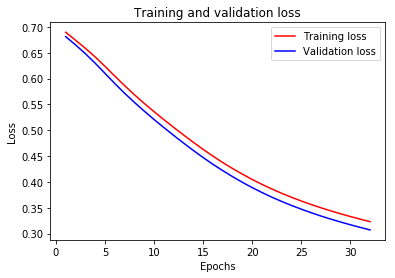

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

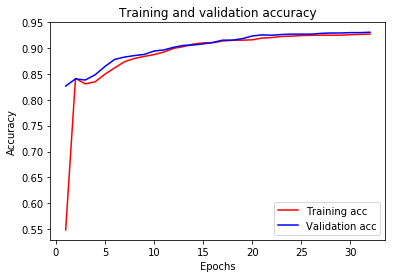

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
redictions = model.predict(train_data)

In [13]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data("./get_the_flag.data")

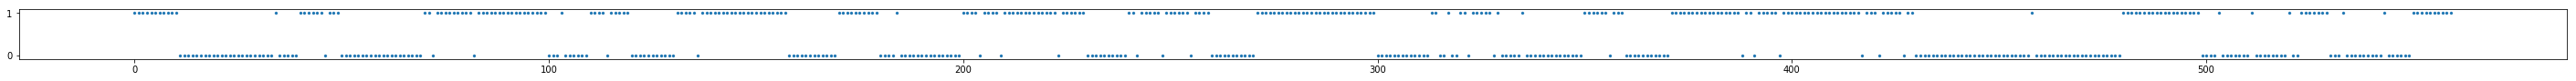

flag:
10001001110101110100111011011100100101111110000011001001


In [14]:
data_show=[]
target=''
flag=''
for i in model.predict(prediction_data):
    if i[0]<0.5:
        data_show.append(0)
        target+='0'
    else:
        data_show.append(1)
        target+='1'
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()
for i in range((int)(len(data_show)/10)):
    tmp=0
    for j in range(10):
        tmp+=data_show[i*10+j]
    if tmp>=5:
        flag+='1'
    else:
        flag+='0'
print("flag:")
print(flag)
